# Beginner Level ML Pipeline Code Reference

## Please note: The following codebase is just for machine learning pipeline reference and has missing codes and logic which has to be implemented by the teams. 

# Reading the data

In [26]:
import pandas as pd

train = pd.read_csv("C://Users//91836//Documents//MDSS_Datathon//datathon_sem2_2021//datathon-beginner-level//train.csv")
test = pd.read_csv("C://Users//91836//Documents//MDSS_Datathon//datathon_sem2_2021//datathon-beginner-level//test.csv")

# Exploratory Data Analysis

In [32]:
train.head(10)

,Store,Item,Sales
Date,,,
2013-01-01,KMart,1,13
2013-01-02,KMart,1,11
2013-01-03,KMart,1,14
2013-01-04,KMart,1,13
2013-01-05,KMart,1,10
2013-01-06,KMart,1,12
2013-01-07,KMart,1,10
2013-01-08,KMart,1,9
2013-01-09,KMart,1,12


In [33]:
test.head()

,Store,Item
Date,,
2017-07-01,KMart,1
2017-07-02,KMart,1
2017-07-03,KMart,1
2017-07-04,KMart,1
2017-07-05,KMart,1


In [29]:
train.shape,test.shape

((821000, 3), (92000, 2))

In [30]:
test.head()

,Store,Item
Date,,
2017-07-01,KMart,1
2017-07-02,KMart,1
2017-07-03,KMart,1
2017-07-04,KMart,1
2017-07-05,KMart,1


In [5]:
train.Item.unique(),train.Store.unique()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
       dtype=int64),
 array(['KMart', 'Target', 'Coles', 'Woolies', 'BigW', 'Aldi',
        'Asian SuperMart', 'Big Savers', 'Costco', 'SupaIGA'], dtype=object))

In [6]:
train.describe()

,Item,Sales
count,821000.000000,821000.000000
mean,25.500000,51.225683
std,14.430878,28.208462
min,1.000000,0.000000
25%,13.000000,29.000000
50%,25.500000,46.000000
75%,38.000000,68.000000
max,50.000000,214.000000


In [7]:
test.describe()

,Item
count,92000.000000
mean,25.500000
std,14.430948
min,1.000000
25%,13.000000
50%,25.500000
75%,38.000000
max,50.000000


In [8]:
train.dtypes

Store    object
Item      int64
Sales     int64
dtype: object

In [9]:
test.dtypes

Store    object
Item      int64
dtype: object

## Time Series Decompostition

- **Level**: The average value in the series.
- **Trend**: The increasing or decreasing value in the series.
- **Seasonality**: The repeating short-term cycle in the series.
- **Noise**: The random variation in the series.


### Combining Time Series components

__Additive Model__

y(t) = Level + Trend + Seasonality + Noise

_An additive model is linear where changes over time are consistently made by the same amount._

__Multiplicative Model__

y(t) = Level * Trend * Seasonality * Noise

_A multiplicative model is nonlinear, such as quadratic or exponential. Changes increase or decrease over time._

__We use multiplicative models when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. On other hand, in the additive model, the magnitude of seasonality does not change in relation to time.__

__Note that the additive model does not vary in frequency and amplitude over time,the multiplicative model does__

### Monthly mean sales

<AxesSubplot:xlabel='Date'>

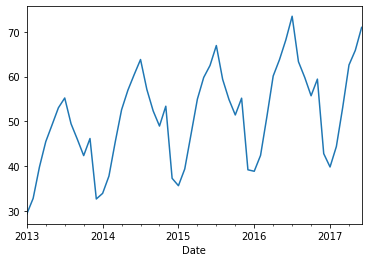

In [14]:
import seaborn as sns

train.Sales.resample('MS').mean().plot() # MS implies Month Starting

_Clearly there is a seasonality effect visible wihtin each year_

# Forecasting using statistical methods

# Feature Engineering

In [34]:
train = train.reset_index() # To get back our Date column

### Introducing the day, month , year features

In [35]:
train['year']=train['Date'].dt.year 
train['month']=train['Date'].dt.month 
train['day']=train['Date'].dt.day

In [36]:
train.head()

,Date,Store,Item,Sales,year,month,day
0,2013-01-01,KMart,1,13,2013,1,1
1,2013-01-02,KMart,1,11,2013,1,2
2,2013-01-03,KMart,1,14,2013,1,3
3,2013-01-04,KMart,1,13,2013,1,4
4,2013-01-05,KMart,1,10,2013,1,5


In [37]:
test.head()

,Store,Item
Date,,
2017-07-01,KMart,1
2017-07-02,KMart,1
2017-07-03,KMart,1
2017-07-04,KMart,1
2017-07-05,KMart,1


In [38]:
train.shape,test.shape

((821000, 7), (92000, 2))

# Data Preprocessing

### Categorical Encoding the Store column

In [40]:
from sklearn.preprocessing import LabelEncoder

# Use Encoder to change categorical data to numerical data

# Encoding Code here 

In [41]:
train.head()

,Date,Store,Item,Sales,year,month,day
0,2013-01-01,6,1,13,2013,1,1
1,2013-01-02,6,1,11,2013,1,2
2,2013-01-03,6,1,14,2013,1,3
3,2013-01-04,6,1,13,2013,1,4
4,2013-01-05,6,1,10,2013,1,5


# Preparing the dev/validation set

In [42]:
from sklearn.model_selection import train_test_split

X = train.loc[:,["Store","Item","month","day","year"]]
y = train.Sales

# Split the data 

X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size = 0.4)

# Modelling using Classical Machine Learning

In [43]:
from sklearn.linear_model import LinearRegression

# Try different Algorithms 

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

## Making predictions

In [44]:
# Make predictions 
pd.Series(model.predict(X_valid),index = X_valid.index)

574700    48.650422
574701    48.658388
574702    48.666354
574703    48.674320
574704    48.682286
            ...    
820995    75.108597
820996    75.116563
820997    75.124529
820998    75.132495
820999    75.140461
Length: 246300, dtype: float64

## Calculating RMSE

In [46]:
from sklearn.metrics import mean_squared_error

mean_squared_error(pd.Series(model.predict(X_valid),index = X_valid.index),y_valid , squared = False)

## IMP: Calculation metric for the datathon is SMAPE. So make appropriate changes

28.821509498380294

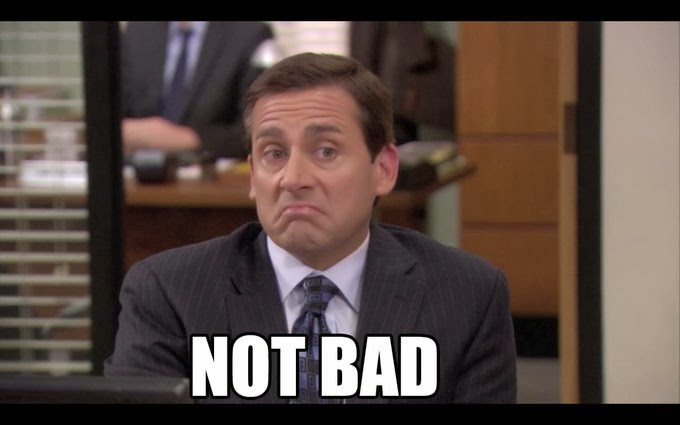

# Now try it out yourself and feel free to experiment with other ML models and forecasting models like Moving Averages